In [98]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('#toggleButton').val('Show Code')
 } else {
 $('div.input').show();
 $('#toggleButton').val('Hide Code')
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" id = "toggleButton" value="Hide Code"></form>''')

In [4]:
import numpy as np
from matplotlib import pylab as plt

<h1><center>Lesson 1: Overview of A/B Testing</center></h1>

## <center>What is A/B Testing?

* A general methodology used online to test a new product or feature before deploying it. 
* We show 2 groups of users 2 different versions of the product. 
<br>
<br> <b>Control Group</b> is shown existing product and 
<br> <b>Treatment Group</b> is shown the variation we need to test.


<img src="_images/ab-testing.png" style = "width:350px;height:200px;">

We measure how differently the 2 sets respond to determine if the new version is better and worth deploying.


## <center>What can A/B testing NOT be used for?

> <i>"A/B Testing helps you climb to the peak of your current mountain, but can't help you choose between 2 mountains" - John Lily</i>

* Not useful for testing a completely new experience. 
    + There is no comparison baseline if new experience completely different than current
    + It is tough to say how long users would need to get used to new experience
    
* Does not tell if you're completely missing another thing you could be doing

* Not effective for testing new premium service: Since users Opt-In for premium, no random control group to compare

* When change is emotional (eg. new brand logo) short window of time not useful.




## <center>Alternatives when A/B Testing cannot be used:

* Check logs, test hypothesis and then run A/B Test
* Use other techniques: User Experience Research, Focus Groups and Surveys, etc.


## <center>How to setup an A/B Test?

Example:
<br>    
<b>Experiement Setup: </b> Change the color of Start Now button 
<img src="_images/start_now.png" style = "width:500px;height:100px;">

<b>Hypothesis:</b> Changing the colow of 'Start Now' button will increase how many students explore Audacity Courses

## <center>How to perform an A/B Test?


### 1. Choose a metric to evaluate the test

&#x2612; Total No. of Courses completed: This will take too long 
<br>&#x2612; No. of clicks by a user: Some users may click too many times
<br>&#x2612; Click Through Rate (CTR) = # Clicks / # Page Views : Does not account for how many users visited.
<br><b>&#x2611; Click Through Probability: Unique Visitors who click / Unique visitors to page</b>
> Rate is used to measure usability <br>
> Probability is used to measure impact


<li><b> Updated Hypothesis:</b> Changing the color of the 'Start Now' button will increase click through probability





### 2. Review Statistics
#### How many clicks would be a surprising number of clicks? (or what click through probability would be surprising?)



#### A] Depends on the distribution of the data:

* In the case of click/no click, the distribution to use is a binomial distribution. 
* Binomial can be used when:
    
    + 2 outcome types: success/fail 
    + Independant events
    + Identical Distribution
     
* Let's simulate 50 coin flips a 10 times and look at the distribution




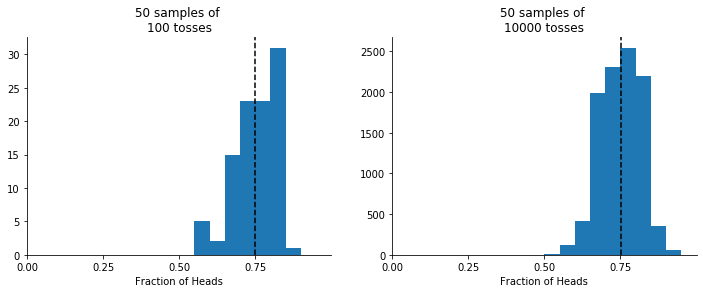

In [83]:
np.random.seed(45)

p=0.75

n1=50
size=100
x1=np.random.binomial(n=n1, p=p, size=size)
x1=x1/50

n2=50
size=10000
x2=np.random.binomial(n=n2, p=p, size=size)
x2=x2/50


plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
plt.hist(x1,bins=np.arange(0, 1, 0.05))
plt.xlim(0,1)
plt.xticks(np.arange(0, 1, 0.25))
plt.xlabel('Fraction of Heads')
plt.title('50 samples of \n100 tosses')
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.axvline(x1.mean(), color = 'black', ls='--')


ax2 = plt.subplot(122)
plt.hist(x2, bins = np.arange(0, 1, 0.05))
plt.xlim(0,1)
plt.xticks(np.arange(0, 1, 0.25))
plt.xlabel('Fraction of Heads')
plt.title('50 samples of \n10000 tosses')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.axvline(x2.mean(), color = 'black', ls='--')




plt.show()

<li> As N increases, binomial approaches normal distribution.

$$
S.D. = \sqrt\frac{p(1-p)}{N}
$$

    
    
<center>$\mu$ = p

<b>Given that it is binomial, look at the sample standard error for binomial and compare to results to determine if they are surprising.</b>

#### B] How we estimate the confidence interval is dependant on the distribution of data:

#### Confidence Interval for a sample


Estimated probability of a click:


$\hat{p} = \frac{X}{N}$

Eg: N = 1000, X = 100, <br><br>
$\hat{p}$ = 0.1 <br>

Probability estimated from the sample will have a margin of error from actual probability over entire population:

<img src="_images/moe.png" style = "width:350px;height:200px;">

<br><br> <b>Thumbrule:</b> <br>
If N * $\hat{p}$ > 5 or N * (1-$\hat{p}$) > 5, <br>Use Normal Distribution

For a Normal Distribution

m = Z x S.E.
<br> 

= Z x $\sqrt\frac{\hat(p)(1-\hat(p))}{N}$

<br>

<li> When No. of samples is large, S.E. is smaller, distribution is tighter, C.I. smaller

<li> When $\hat(p)$ is farther from 0.5, S.E. is smaller, distribution is tighter, C.I. smaller




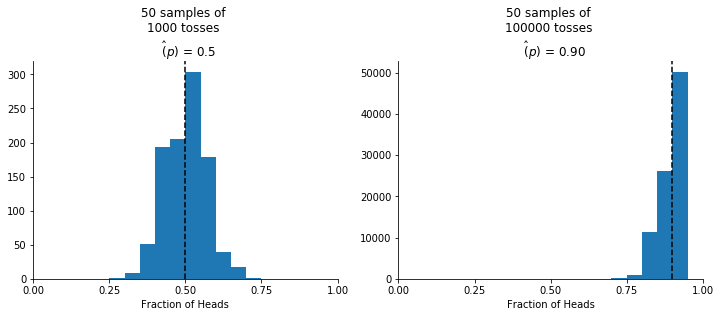

In [88]:
np.random.seed(45)

p1=0.5
p2 = 0.90

n1=50
size=1000
x1=np.random.binomial(n=n1, p=p1, size=size)
x1=x1/50

n2=50
size=100000
x2=np.random.binomial(n=n2, p=p2, size=size)
x2=x2/50


plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
plt.hist(x1,bins=np.arange(0, 1, 0.05))
plt.xlim(0,1)
plt.xticks(np.arange(0, 1.25, 0.25))
plt.xlabel('Fraction of Heads')
plt.title('50 samples of \n1000 tosses \n  $\hat(p)$ = 0.5')
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.axvline(x1.mean(), color = 'black', ls='--')


ax2 = plt.subplot(122)
plt.hist(x2, bins = np.arange(0, 1, 0.05))
plt.xlim(0,1)
plt.xticks(np.arange(0, 1.25, 0.25))
plt.xlabel('Fraction of Heads')
plt.title('50 samples of \n100000 tosses \n  $\hat(p)$ = 0.90')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.axvline(x2.mean(), color = 'black', ls='--')




plt.show()

<li> For a Normal Distribution with $\mu$ = 0, $\sigma$ = 1, aka Z distribution

    

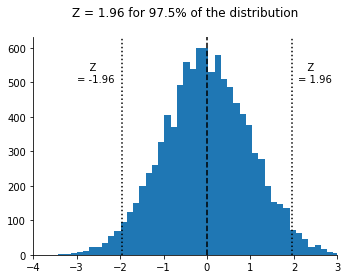

In [89]:
np.random.seed(45)

p1=0

mu, sigma = 0, 1
s = np.random.normal(mu, sigma, 10000)



plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
count, bins, ignored = plt.hist(s, 50)

plt.xlim(0,1.99)
plt.xticks(np.arange(-4, 4, 1))
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax1.axvline(0, color = 'black', ls='--')
ax1.axvline(-1.96, color = 'black', ls=':')
ax1.axvline(1.96, color = 'black', ls=':')

plt.title('Z = 1.96 for 97.5% of the distribution\n')

plt.text(-3,500,'    Z \n= -1.96')
plt.text(2.1,500,'   Z \n= 1.96')

plt.show()

For estimated probability of a click with $\hat(p)$ = 0.1, at a confidence level of 97.5%, Margin of error: <br>

m = 1.96 * (0.1 * 0.9) / 1000 <br>
m = 0.019

So Confidence Interval <br>
C.I. = 0.1 $\pm$ 0.019 <br>
C.I. = 0.081 to 0.119 <br>

<b> So if we run the experiment a 1000 times, we would expect to see between 81 to 119 clicks. Anything outside that would be suprising. </b>


#### How likely is it that this click through probability was obtained by chance?

Set statistical significance and perform hypothesis testing. 
<ol>
<li>Define Hypotheses: </li>
    <ul>
    <li> Null Hypothesis Ho: Click Through Probability of Control & Experiment groups are the same. </li>
    P<sub>exp </sub> - P<sub>control </sub> = 0
    <li> Null Ho: Click Through Probability of Control & Experiment groups are not the same</li>
    P<sub>exp </sub> - P<sub>control </sub>  != 0
    </ul>

<li> Measure difference <br>$\hat d$ = $\hat P $<sub>exp</sub> - $\hat P $<sub>cont</sub></li>
<li> Check difference given H<sub>o</sub> is True ($\hat P$<sub>exp</sub> - $\hat P$<sub>cont</sub>| H<sub>o</sub>)</li>
    and check if results obtained by chance (outside margin of error) <br>if we expect d follows Normal distribution and we want a confidence level of 97.5% <br>
    then if $$
    \hat d > 1.96 * S.E. \\
    \hat d < 1.96 * S.E. 
    $$
    
It is outside the margin of error so statistically significant and not by chance.<br> 
So we reject H <sub>o</sub> and conclude Click Through Probabilities for the 2 groups are not the same
    
       
    
</ol>


### 3. Design the Experiment

#### A] How many page views needed?

<li>Given that we have control over how many page views go into the control and experiment group, we need to decide how many page views needed before we can conclude we have a statistically significant result.<br>
i.e. What is the Statistical Power needed</li>
<br>
<li> $\alpha$ (Type I Error):
<br> Probability of concluding there is a difference when there isn't 
<br> i.e. Probability of launching a bad experiment i.e.
<br> i.e. Probability of rejecting a true H<sub>o</sub> 
<br><br>
<li> $\beta$ (Type II Error):
<br> Probability of concluding there is no difference when there is
<br> Probability of failing to launch a good experiment.
<br> i.e. Probability of failing to reject a false H<sub>o</sub>
<br><br>    
<li> 1 - $\beta$ is Power (or sensitivity). 
<br> Can be thought of as ability to detect a true difference.

<img src="_images/large_sample.png" style = "width:450px;height:300px;">

<br> With larger samples, distribution gets narrower i.e. S.E. decreases. 
<br> For the same $\alpha$, the thresholds for rejecting null come closer to 0, 
    
<br><br>    
<img src="_images/errors_small_samples.png" style = "width:450px;height:300px;">
    
<br>
<li> With a small sample, 
<br> $\alpha$ is low,
<br> i.e. low Probability of concluding there is a difference when there isn't
<br> i.e. you are unlikely to launch a bad experiment.
    
<br> But $\beta$ is high, 
<br> i.e. Probability of failing to reject false H<sub>0</sub>  
i.e. you are more likely to fail to launch a good experiment.
    

<img src="_images/errors_large_samples.png" style = "width:450px;height:300px;">

    
<li> With a large sample, 
<br> $\alpha$ is unchanged,
<br> i.e. low Probability of concluding there is a difference when there isn't
<br> i.e. you are equally unlikely to launch a bad experiment.
    
<br> But $\beta$ is low, 
<br> i.e. Probability of failing to false H<sub>0</sub>  
i.e. you are more likely to launch a good experiment.
    



#### B] How many subjects needed?
Based on:    
<li> Baseline Conversion rate (When there is no change yet)
<li> Minimum detectable effect (Minimum Practical Significance = d <sub>cont</sub> - d<sub>exp</sub>
<li> Statistical Significance: $\alpha$
    
Sample Size Calculator: https://www.evanmiller.org/ab-testing/sample-size.html    
    

### 4. Analyze the results

Example covered in subsequent chapters

In [99]:
HTML(
'''

<hr>
<div dir = "rtl">
<ul style = 'list-style-type:square'>
<li> End of Document
</li>

'''

)

In [100]:
HTML('''<script>
$(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
 });
</script>
''')